In [13]:
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [14]:
df = pd.read_csv("./clean_data/fully_merged_data.csv")

df = df.dropna()

# remove null values
arr = df.index[df["fel_misd"] == ' ']
df = df.drop(arr, axis=0)
arr = df.index[df["fel_misd"] == '\xa0']
df = df.drop(arr, axis=0)

from scipy.stats import zscore

need_norm = ["age","MEDHINC_CY", "WLTHINDXCY", "TOTHH_CY"]
norm = df[need_norm].apply(zscore)

df[need_norm] = norm

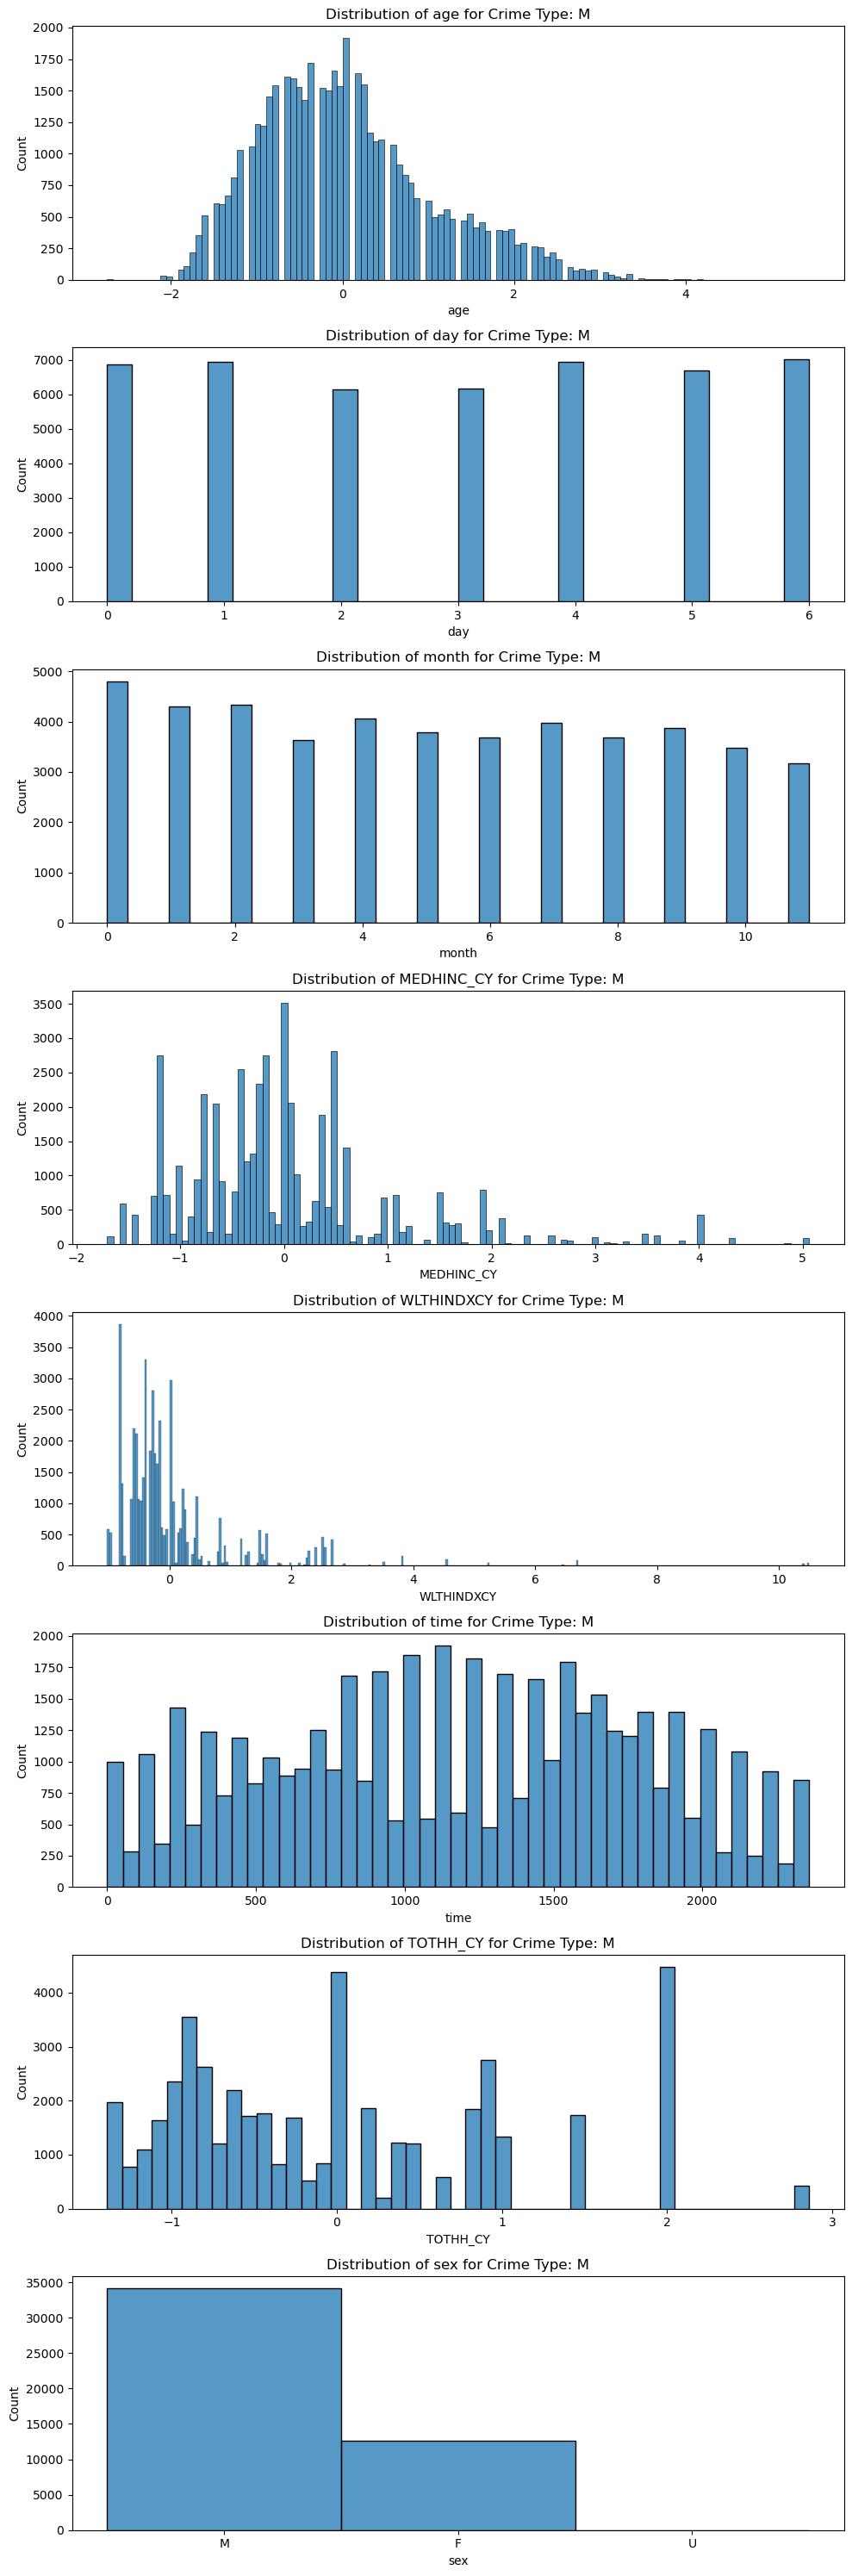

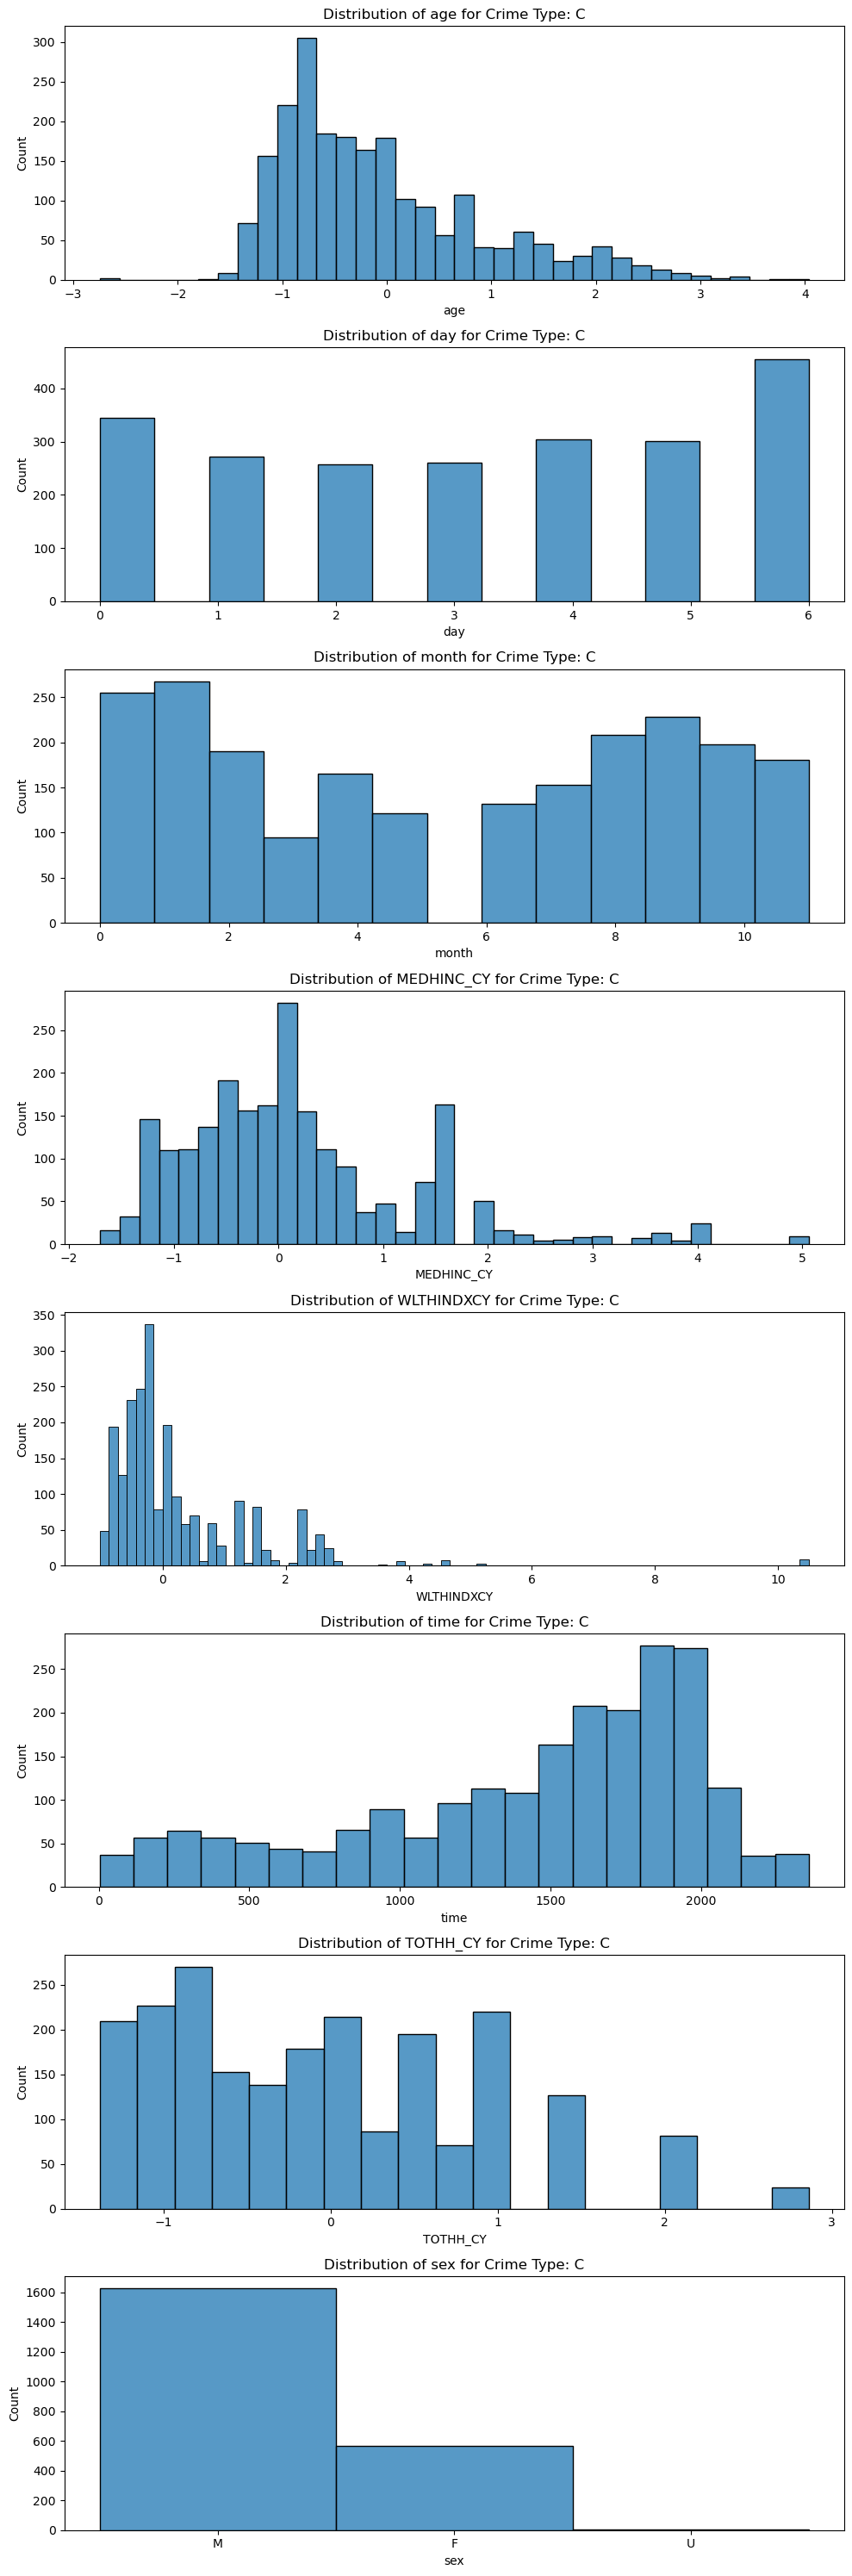

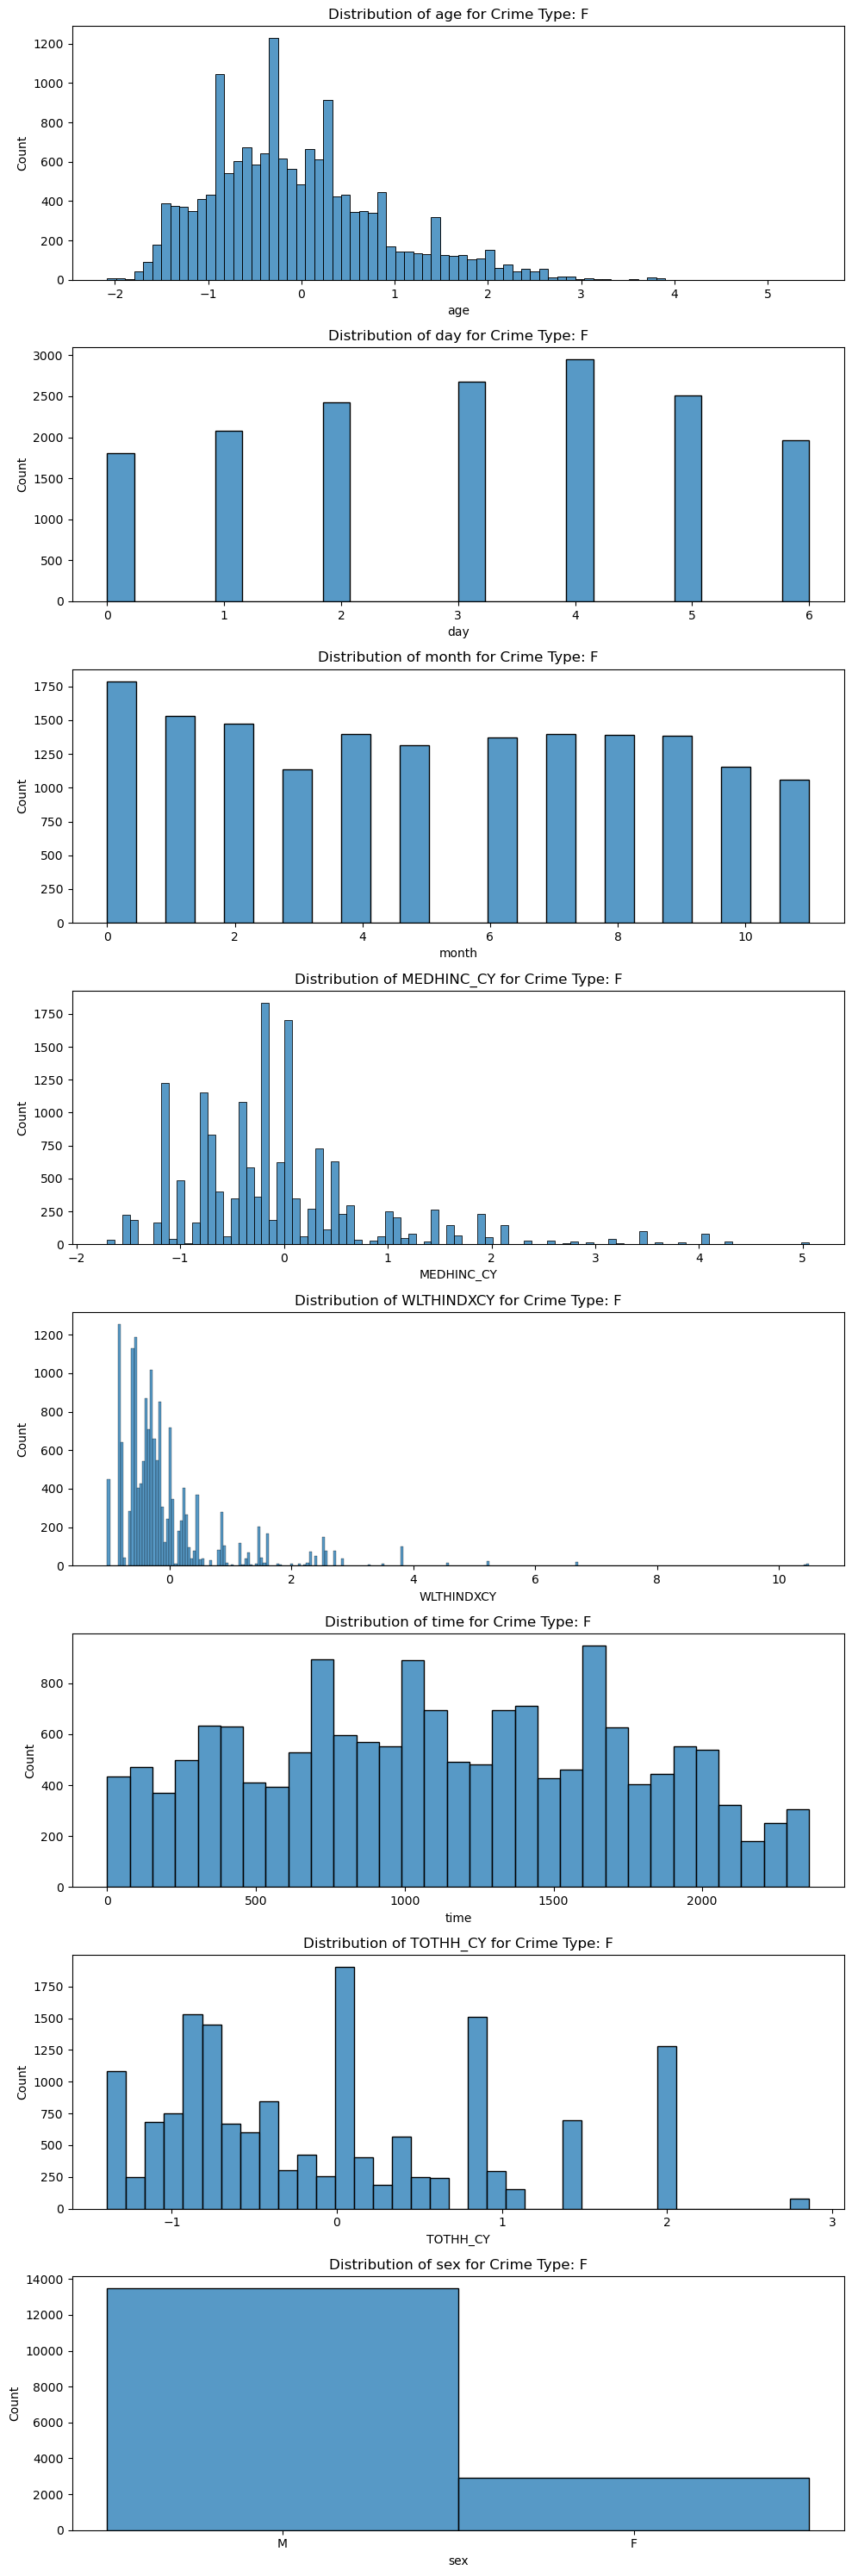

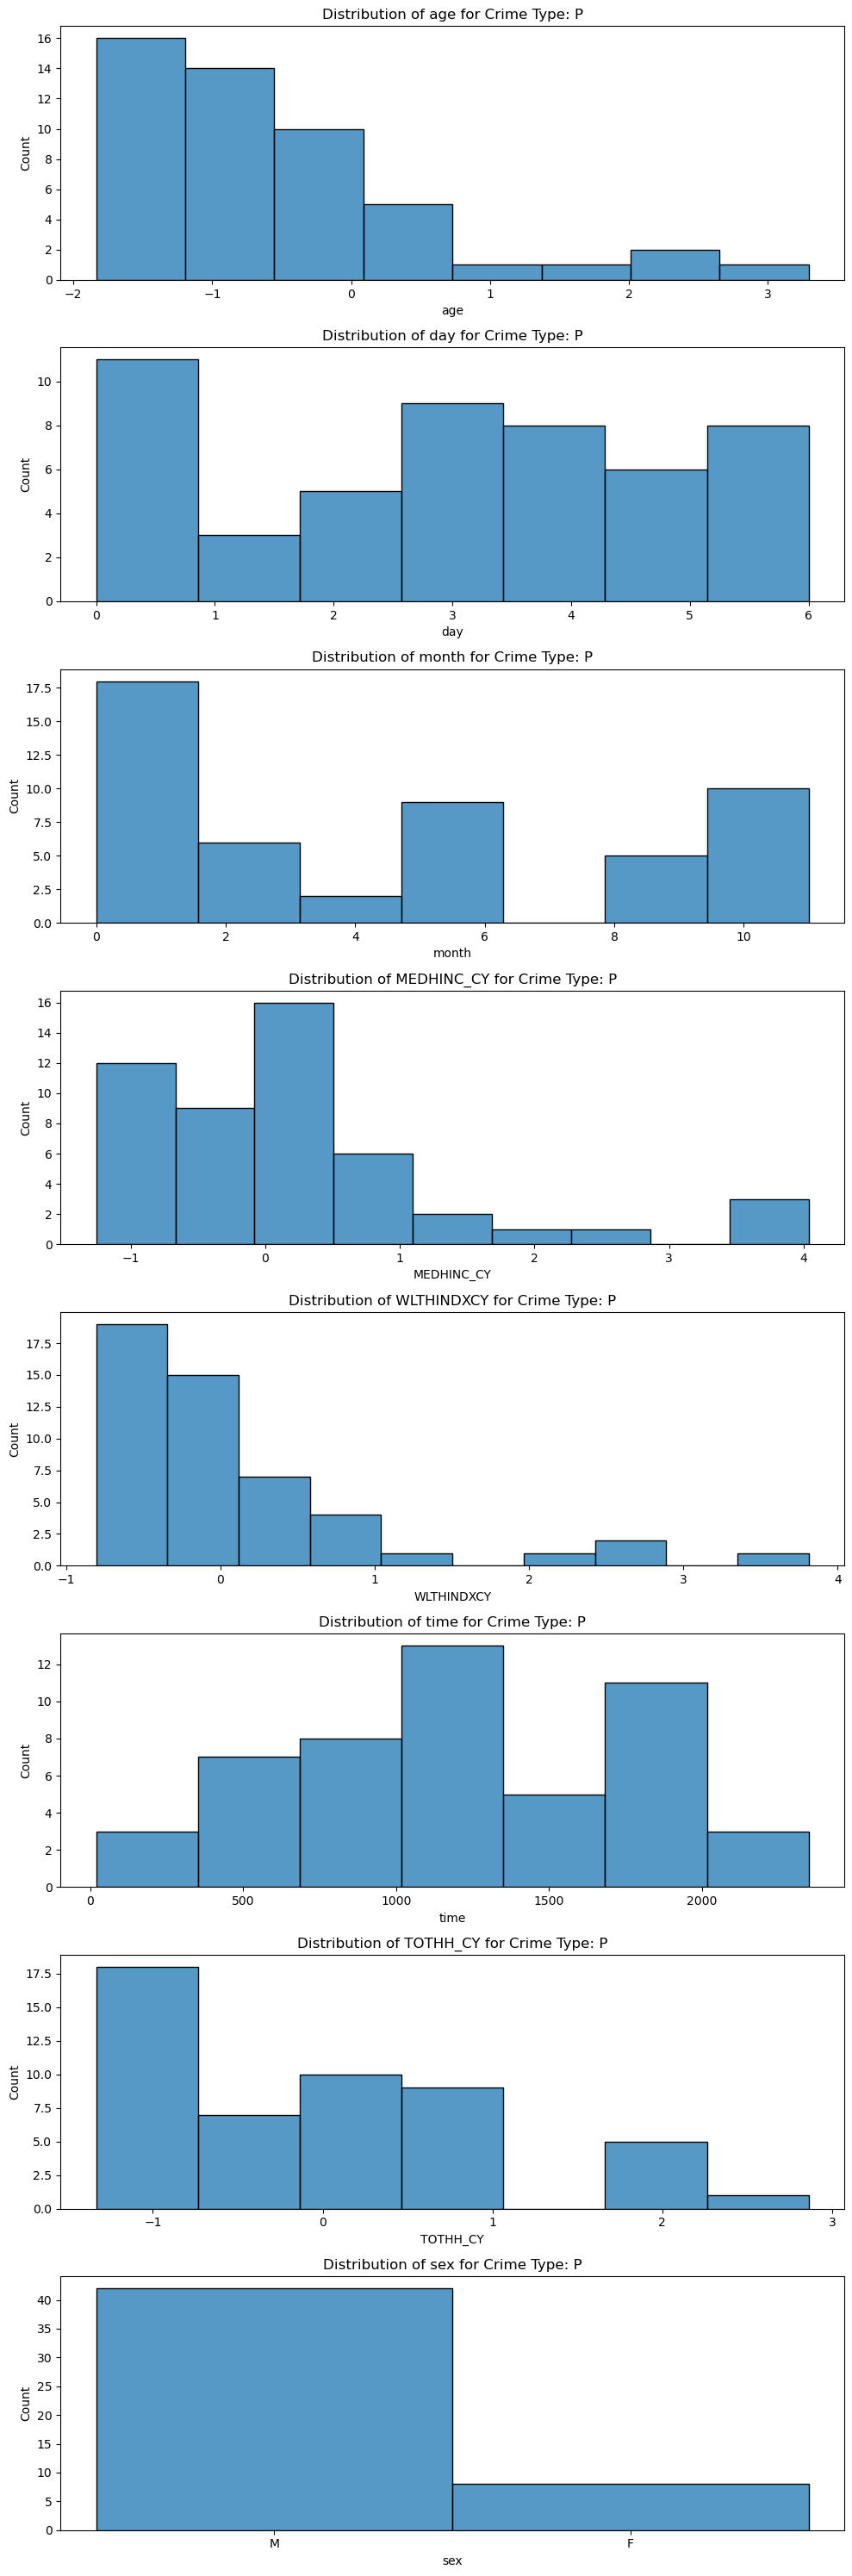

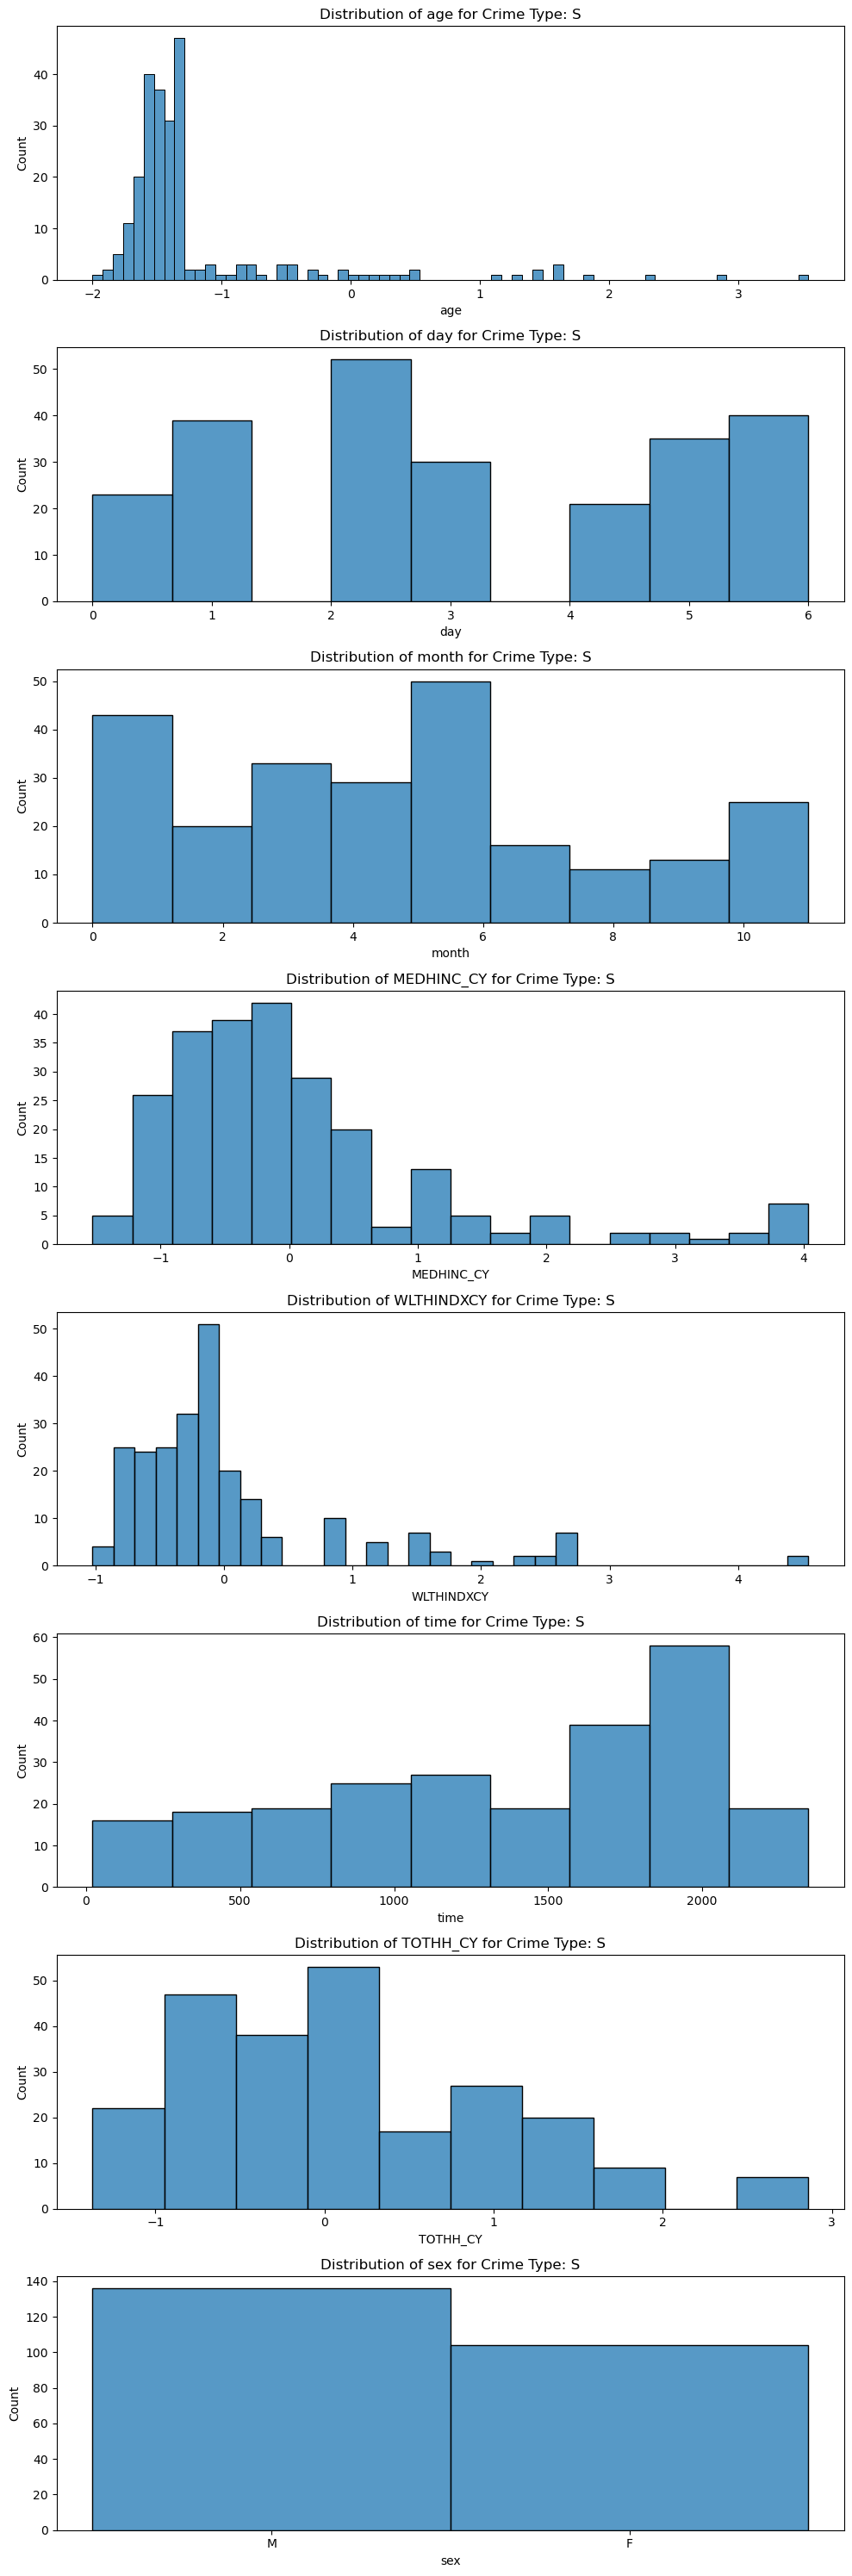

In [15]:
# Histogram plots for each crime type

unique_crime_types = df['fel_misd'].unique()

for crime_type in unique_crime_types:
    # only current crime type
    filtered_df = df[df['fel_misd'] == crime_type]
    
    fig, axes = plt.subplots(nrows= len(filtered_df.columns) - 1, ncols=1, figsize=(10, 30))
    
    # for each feature add it to it's respective graph
    for i, column in enumerate(filtered_df.columns):
        if column != 'fel_misd':
            ax = axes[i-1] if len(filtered_df.columns) > 2 else axes
            sb.histplot(filtered_df[column], ax=ax)
            ax.set_title(f'Distribution of {column} for Crime Type: {crime_type}')
    
    # Show the plot
    plt.tight_layout()
    plt.show()